In [100]:
import redis 
from deepface import DeepFace
from deepface.commons import functions, distance 
import matplotlib.pyplot as plt 
import numpy as np

In [45]:
r = redis.StrictRedis(host = 'localhost', port = 6379)

In [4]:
model = DeepFace.build_model("Facenet")

facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /home/morsalin/.deepface/weights/facenet_weights.h5
100%|████████████████████████████████████████████████████████████████████| 92.2M/92.2M [07:17<00:00, 211kB/s]


In [5]:
input_shape = (160, 160)

In [7]:
source_path = 'source.jpg' 
source = functions.preprocess_face(source_path, target_size = input_shape)

⚠️ Function preprocess_face function is deprecated! Use extract_faces instead of this.


In [8]:
source

array([[[0.5294118 , 0.5294118 , 0.5294118 ],
        [0.52156866, 0.52156866, 0.52156866],
        [0.49803922, 0.49803922, 0.49803922],
        ...,
        [0.02352941, 0.02745098, 0.06666667],
        [0.03529412, 0.04705882, 0.08627451],
        [0.03529412, 0.04705882, 0.07843138]],

       [[0.5019608 , 0.5019608 , 0.5019608 ],
        [0.5568628 , 0.5568628 , 0.5568628 ],
        [0.54901963, 0.54901963, 0.54901963],
        ...,
        [0.01960784, 0.02352941, 0.0627451 ],
        [0.01960784, 0.03921569, 0.07450981],
        [0.00392157, 0.01176471, 0.04313726]],

       [[0.5176471 , 0.5176471 , 0.5176471 ],
        [0.49803922, 0.49803922, 0.49803922],
        [0.5176471 , 0.5176471 , 0.5176471 ],
        ...,
        [0.00392157, 0.00784314, 0.04705882],
        [0.01176471, 0.02352941, 0.06666667],
        [0.01960784, 0.03921569, 0.07450981]],

       ...,

       [[0.10196079, 0.18039216, 0.2509804 ],
        [0.0627451 , 0.10196079, 0.1882353 ],
        [0.04705882, 0

In [9]:
source.shape

(160, 160, 3)

In [15]:
# Load image using DeepFace
img = functions.load_image('source.jpg')

# Preprocess image using DeepFace
img = functions.preprocess_face(img)


⚠️ Function preprocess_face function is deprecated! Use extract_faces instead of this.


In [16]:
img

array([[[0.34509805, 0.34509805, 0.34509805],
        [0.54901963, 0.54901963, 0.54901963],
        [0.5254902 , 0.5254902 , 0.5254902 ],
        ...,
        [0.01960784, 0.02745098, 0.05098039],
        [0.02352941, 0.02745098, 0.05098039],
        [0.02352941, 0.03137255, 0.05098039]],

       [[0.30980393, 0.30980393, 0.30980393],
        [0.4745098 , 0.4745098 , 0.4745098 ],
        [0.5372549 , 0.5372549 , 0.5372549 ],
        ...,
        [0.02352941, 0.03529412, 0.07058824],
        [0.01568628, 0.03529412, 0.07058824],
        [0.01960784, 0.03137255, 0.0627451 ]],

       [[0.3372549 , 0.3372549 , 0.3372549 ],
        [0.5568628 , 0.5568628 , 0.5568628 ],
        [0.5568628 , 0.5568628 , 0.5568628 ],
        ...,
        [0.02352941, 0.03137255, 0.07058824],
        [0.01176471, 0.03137255, 0.06666667],
        [0.01568628, 0.02745098, 0.05882353]],

       ...,

       [[0.12941177, 0.21568628, 0.2901961 ],
        [0.05490196, 0.10980392, 0.19607843],
        [0.07843138, 0

In [17]:
img.shape

(224, 224, 3)

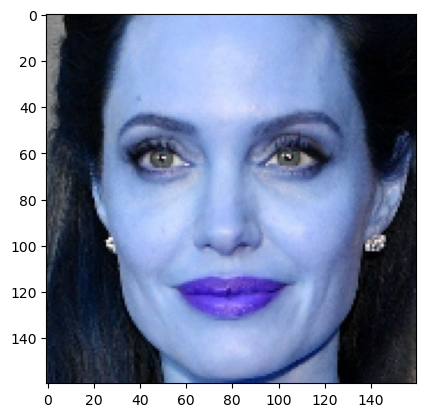

In [35]:
plt.imshow(source)

In [37]:
embedding_objs = DeepFace.represent(img_path = source_path)

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /home/morsalin/.deepface/weights/vgg_face_weights.h5
100%|██████████████████████████████████████████████████████████████████████| 580M/580M [16:23<00:00, 590kB/s]


In [38]:
embedding_objs

[{'embedding': [0.013966060243546963,
   -0.019165661185979843,
   0.009001032449305058,
   0.011942023411393166,
   -0.0006997943273745477,
   -0.000520008965395391,
   0.012505206279456615,
   0.03823938965797424,
   -0.02124604396522045,
   0.027135003358125687,
   0.010535256005823612,
   -0.006526971701532602,
   0.015458747744560242,
   -0.004144920967519283,
   0.005084511823952198,
   0.005633052904158831,
   0.009534447453916073,
   0.013842673040926456,
   0.006062385626137257,
   0.004286583513021469,
   0.007889088243246078,
   0.01974043995141983,
   0.005174161400645971,
   0.006690568290650845,
   -0.012963732704520226,
   -0.010754339396953583,
   0.006945489905774593,
   0.006475004367530346,
   0.024485310539603233,
   0.02330976538360119,
   0.01656346768140793,
   -0.01553734764456749,
   -0.034394923597574234,
   0.024666840210556984,
   0.023562941700220108,
   0.007755947299301624,
   -0.02040514163672924,
   -0.030991867184638977,
   0.0053382329642772675,
   -0

In [39]:
embedding = embedding_objs[0]["embedding"]

In [40]:
embedding

[0.013966060243546963,
 -0.019165661185979843,
 0.009001032449305058,
 0.011942023411393166,
 -0.0006997943273745477,
 -0.000520008965395391,
 0.012505206279456615,
 0.03823938965797424,
 -0.02124604396522045,
 0.027135003358125687,
 0.010535256005823612,
 -0.006526971701532602,
 0.015458747744560242,
 -0.004144920967519283,
 0.005084511823952198,
 0.005633052904158831,
 0.009534447453916073,
 0.013842673040926456,
 0.006062385626137257,
 0.004286583513021469,
 0.007889088243246078,
 0.01974043995141983,
 0.005174161400645971,
 0.006690568290650845,
 -0.012963732704520226,
 -0.010754339396953583,
 0.006945489905774593,
 0.006475004367530346,
 0.024485310539603233,
 0.02330976538360119,
 0.01656346768140793,
 -0.01553734764456749,
 -0.034394923597574234,
 0.024666840210556984,
 0.023562941700220108,
 0.007755947299301624,
 -0.02040514163672924,
 -0.030991867184638977,
 0.0053382329642772675,
 -0.011004889383912086,
 0.007551189046353102,
 0.015828892588615417,
 -0.019559644162654877,
 -

In [42]:
embedding_numpy = np.array(embedding)

In [43]:
embedding_numpy

array([ 0.01396606, -0.01916566,  0.00900103, ...,  0.00220629,
        0.00081652,  0.00920541])

In [44]:
embedding_numpy.shape

(2622,)

In [49]:
r.rpush("embedding:angelina", *embedding)

5244

In [47]:
type(embedding)

list

In [50]:
embedding

[0.013966060243546963,
 -0.019165661185979843,
 0.009001032449305058,
 0.011942023411393166,
 -0.0006997943273745477,
 -0.000520008965395391,
 0.012505206279456615,
 0.03823938965797424,
 -0.02124604396522045,
 0.027135003358125687,
 0.010535256005823612,
 -0.006526971701532602,
 0.015458747744560242,
 -0.004144920967519283,
 0.005084511823952198,
 0.005633052904158831,
 0.009534447453916073,
 0.013842673040926456,
 0.006062385626137257,
 0.004286583513021469,
 0.007889088243246078,
 0.01974043995141983,
 0.005174161400645971,
 0.006690568290650845,
 -0.012963732704520226,
 -0.010754339396953583,
 0.006945489905774593,
 0.006475004367530346,
 0.024485310539603233,
 0.02330976538360119,
 0.01656346768140793,
 -0.01553734764456749,
 -0.034394923597574234,
 0.024666840210556984,
 0.023562941700220108,
 0.007755947299301624,
 -0.02040514163672924,
 -0.030991867184638977,
 0.0053382329642772675,
 -0.011004889383912086,
 0.007551189046353102,
 0.015828892588615417,
 -0.019559644162654877,
 -

In [51]:
embedding_string = ",".join(str(element) for element in embedding)

In [52]:
embedding_string

'0.013966060243546963,-0.019165661185979843,0.009001032449305058,0.011942023411393166,-0.0006997943273745477,-0.000520008965395391,0.012505206279456615,0.03823938965797424,-0.02124604396522045,0.027135003358125687,0.010535256005823612,-0.006526971701532602,0.015458747744560242,-0.004144920967519283,0.005084511823952198,0.005633052904158831,0.009534447453916073,0.013842673040926456,0.006062385626137257,0.004286583513021469,0.007889088243246078,0.01974043995141983,0.005174161400645971,0.006690568290650845,-0.012963732704520226,-0.010754339396953583,0.006945489905774593,0.006475004367530346,0.024485310539603233,0.02330976538360119,0.01656346768140793,-0.01553734764456749,-0.034394923597574234,0.024666840210556984,0.023562941700220108,0.007755947299301624,-0.02040514163672924,-0.030991867184638977,0.0053382329642772675,-0.011004889383912086,0.007551189046353102,0.015828892588615417,-0.019559644162654877,-0.015348698012530804,0.0006518076988868415,-0.0075778719037771225,0.001354159554466605

In [55]:
r.rpush('embeddingangelina1', embedding_string)

1

In [54]:
type(embedding_string)

str

In [56]:
embedding_list = embedding_string.split(',')
r.rpush('embeddingangelina2', *embedding_list)

2622

In [57]:
len(embedding_list)

2622

In [58]:
# we will work with embeddingangelina2 


In [59]:
# Target

In [72]:
target_path = "target/img1.jpg"

In [75]:
target_face = functions.preprocess_face(target_path, target_size = input_shape)

⚠️ Function preprocess_face function is deprecated! Use extract_faces instead of this.


In [76]:
target_face

array([[[0.        , 0.        , 0.        ],
        [0.04705882, 0.04313726, 0.03921569],
        [0.39607844, 0.34901962, 0.30980393],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.04313726, 0.03921569, 0.03529412],
        [0.40392157, 0.3647059 , 0.3254902 ],
        ...,
        [0.00392157, 0.00392157, 0.00784314],
        [0.00784314, 0.00784314, 0.01176471],
        [0.01176471, 0.01176471, 0.01568628]],

       [[0.        , 0.        , 0.        ],
        [0.04705882, 0.03921569, 0.03921569],
        [0.4117647 , 0.3647059 , 0.33333334],
        ...,
        [0.        , 0.00784314, 0.01176471],
        [0.03137255, 0.03529412, 0.07450981],
        [0.04705882, 0.06666667, 0.09803922]],

       ...,

       [[0.5058824 , 0.58431375, 0.6       ],
        [0.49019608, 0.54509807, 0.5568628 ],
        [0.4392157 , 0

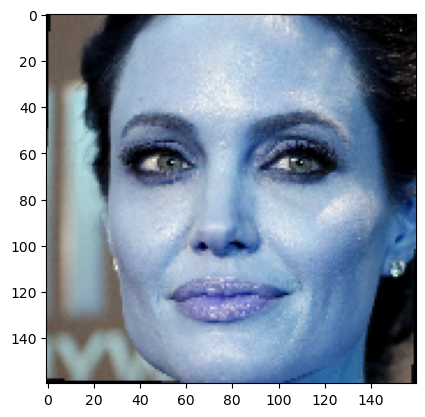

In [77]:
plt.imshow(target_face)

In [79]:
target_embedding_objs = DeepFace.represent(img_path = target_path) 
target_embedding = target_embedding_objs[0]["embedding"] 
target_embedding

[0.014190695248544216,
 -0.012705063447356224,
 0.0004903725348412991,
 0.017148595303297043,
 -0.0002697813615668565,
 0.0023872614838182926,
 0.007016720715910196,
 0.03164485841989517,
 -0.015483643859624863,
 0.021456586197018623,
 0.010434671305119991,
 -0.0012143637286499143,
 0.01291472278535366,
 -0.005937009584158659,
 0.006189246661961079,
 0.0002544384333305061,
 0.021165398880839348,
 0.0243473369628191,
 -0.005452287383377552,
 0.013998783193528652,
 0.004091330338269472,
 0.014226837083697319,
 0.0035157077945768833,
 0.009442238137125969,
 -0.003745205234736204,
 -0.014760651625692844,
 -0.0033407961018383503,
 0.016490919515490532,
 0.021618971601128578,
 0.016874708235263824,
 0.009609225206077099,
 -0.012215708382427692,
 -0.016690293326973915,
 0.007949824444949627,
 0.023178447037935257,
 -0.0018292636377736926,
 -0.02253321185708046,
 -0.0216971542686224,
 0.0050693233497440815,
 -0.0022158422507345676,
 0.007496113423258066,
 0.004693610593676567,
 -0.017313469201

In [81]:
len(target_embedding)

2622

In [82]:
source_embedding_from_redis = r.lrange("embeddingangelina2", 0, -1) 
source_embedding_from_redis

[b'0.013966060243546963',
 b'-0.019165661185979843',
 b'0.009001032449305058',
 b'0.011942023411393166',
 b'-0.0006997943273745477',
 b'-0.000520008965395391',
 b'0.012505206279456615',
 b'0.03823938965797424',
 b'-0.02124604396522045',
 b'0.027135003358125687',
 b'0.010535256005823612',
 b'-0.006526971701532602',
 b'0.015458747744560242',
 b'-0.004144920967519283',
 b'0.005084511823952198',
 b'0.005633052904158831',
 b'0.009534447453916073',
 b'0.013842673040926456',
 b'0.006062385626137257',
 b'0.004286583513021469',
 b'0.007889088243246078',
 b'0.01974043995141983',
 b'0.005174161400645971',
 b'0.006690568290650845',
 b'-0.012963732704520226',
 b'-0.010754339396953583',
 b'0.006945489905774593',
 b'0.006475004367530346',
 b'0.024485310539603233',
 b'0.02330976538360119',
 b'0.01656346768140793',
 b'-0.01553734764456749',
 b'-0.034394923597574234',
 b'0.024666840210556984',
 b'0.023562941700220108',
 b'0.007755947299301624',
 b'-0.02040514163672924',
 b'-0.030991867184638977',
 b'0.0

In [83]:
len(source_embedding_from_redis)

2622

In [86]:
source_embedding_from_redis_numpy = np.array(source_embedding_from_redis).astype(float)
source_embedding_from_redis_numpy

array([ 0.01396606, -0.01916566,  0.00900103, ...,  0.00220629,
        0.00081652,  0.00920541])

In [87]:
source_embedding_from_redis_numpy.shape

(2622,)

In [108]:
distance = distance.findCosineDistance(source_embedding_from_redis_numpy, target_embedding)

In [110]:
distance <= .40  
# cosine threshold is .40 that is why target image is a match

True

In [111]:
## Second test

In [92]:
source2_path = 'source2.jpg' 
source2 = functions.preprocess_face(source2_path, target_size = input_shape)

⚠️ Function preprocess_face function is deprecated! Use extract_faces instead of this.


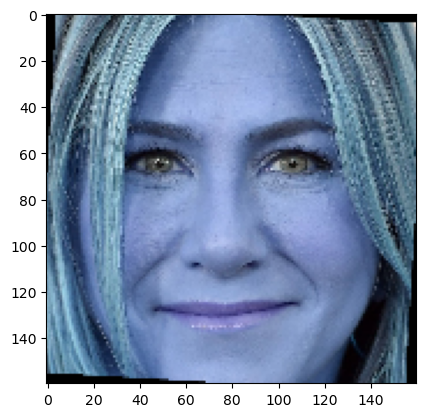

In [93]:
plt.imshow(source2)

In [94]:
embedding_objs_source2 = DeepFace.represent(img_path = source2_path)

In [95]:
embedding_source2 = embedding_objs_source2[0]["embedding"]
embedding_source2

[0.006695239804685116,
 -0.0024991207756102085,
 0.006880584172904491,
 0.017469223588705063,
 0.018250351771712303,
 0.00785405095666647,
 0.012798978015780449,
 0.00249384599737823,
 0.003962037153542042,
 0.00230391719378531,
 0.028071768581867218,
 0.010041004978120327,
 0.018786970525979996,
 0.00440814858302474,
 0.011344674043357372,
 0.008973480202257633,
 0.016815878450870514,
 0.016744257882237434,
 0.0036879470571875572,
 0.009857038967311382,
 0.008959878236055374,
 0.004627836402505636,
 -0.00984866637736559,
 0.014224130660295486,
 0.005603495053946972,
 -0.0006341916741803288,
 0.0001055633183568716,
 -0.002253264421597123,
 0.022798260673880577,
 0.004513547755777836,
 0.014874684624373913,
 -0.0025072460994124413,
 0.004008231684565544,
 0.00830843672156334,
 0.015306525863707066,
 0.029129356145858765,
 0.02006249502301216,
 -0.013723346404731274,
 -0.0019955236930400133,
 0.025610212236642838,
 0.0034026745706796646,
 -0.008410526439547539,
 -0.007817452773451805,
 -

In [96]:
source2_embedding_string = ",".join(str(element) for element in embedding_source2) 
source2_embedding_list = source2_embedding_string.split(',')
r.rpush('embeddingsource2', *source2_embedding_list)

2622

In [98]:
source2_embedding_from_redis = r.lrange("embeddingsource2", 0, -1) 
source2_embedding_from_redis_numpy = np.array(source2_embedding_from_redis).astype(float)
source2_embedding_from_redis_numpy

array([ 0.00669524, -0.00249912,  0.00688058, ..., -0.03321399,
        0.00488809,  0.01737999])

In [101]:
distance_for_source2 = distance.findCosineDistance(source2_embedding_from_redis_numpy, target_embedding)

In [106]:
distance_for_source2 <= .40  
# cosine threshold is .40 that is why source 2 is not a match

False